Data source:http://yann.lecun.com/exdb/mnist/; tutorial:https://www.bilibili.com/video/BV14J411X7Bb?p=6

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False    #用来正常显示负号
"""
【Plt 中字显示问题 （Display Chinese words with plt）】

Reference Link：https://blog.csdn.net/helunqu2017/article/details/78602959

1.
from pylab import * 
import matplotlib
matplotlib.rcParams['font.family'] = 'Microsoft YaHei'
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei'] #更新字体格式
mpl.rcParams['font.size'] = 9 

2.
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

AR PL UMing CN代表：宋体。SimHei代表：黑体。

3.
pyplot不默认支持中文显示，需要rcParams修改字体来实现
rcParams的属性：
‘font.family’ 用于显示字体的名字
‘font.style’ 字体风格，正常’normal’ 或斜体’italic’
‘font.size’ 字体大小，整数字号或者’large’ ‘x-small’

例:
matplotlib.rcParams[‘font.family’] = ‘STSong’
matplotlib.rcParams[‘font.size’] = 20
设定绘制区域的全部字体变成 华文仿宋，字体大小为20
...

"""

import numpy as np

from sklearn import datasets

import warnings
warnings.filterwarnings("ignore")

"""
Why using from 【xx import yy】 instead of 【import xx】
Reference link: https://www.pythonf.cn/read/106215
"""

#### 导入digits数据集

In [6]:
digits = datasets.load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [16]:
print(digits.keys())
print(digits.target_names)
print("")
print(digits.DESCR)


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
[0 1 2 3 4 5 6 7 8 9]

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test se

In [18]:
data=digits.data
label=digits.target
data.shape

(1797, 64)

In [19]:
n_sample,n_feature=data.shape

In [21]:
label

array([0, 1, 2, ..., 8, 9, 8])

#### 降维

##### KSNE特点 高维空间中离得远的点，降维后依然离得远；维空间中离得近的点，降维后依然离得近

In [24]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,init="pca",random_state=6)

In [26]:
X_tsne=tsne.fit_transform(data) # 原始数据集上拟合转换

In [27]:
X_tsne

array([[ -3.3685207,  56.730175 ],
       [ 27.991343 , -19.290934 ],
       [ 19.69584  ,  -7.6378155],
       ...,
       [ 11.079504 , -12.637199 ],
       [-18.091951 ,  26.601572 ],
       [  7.1019197,  -8.6928215]], dtype=float32)

###### 归一化

In [28]:
x_min,x_max=np.min(X_tsne,0),np.max(X_tsne,0)
x_min

array([-52.920963, -62.186382], dtype=float32)

In [29]:
X_tsne.shape

(1797, 2)

In [30]:
X_tsne=(X_tsne-x_min)/(x_max-x_min)

In [31]:
X_tsne

array([[0.40233588, 0.9274444 ],
       [0.656959  , 0.33454672],
       [0.58960456, 0.4254308 ],
       ...,
       [0.5196451 , 0.38643998],
       [0.2827905 , 0.69246787],
       [0.48734954, 0.41720265]], dtype=float32)

#### scatter plot of X_tsne 二维可视化

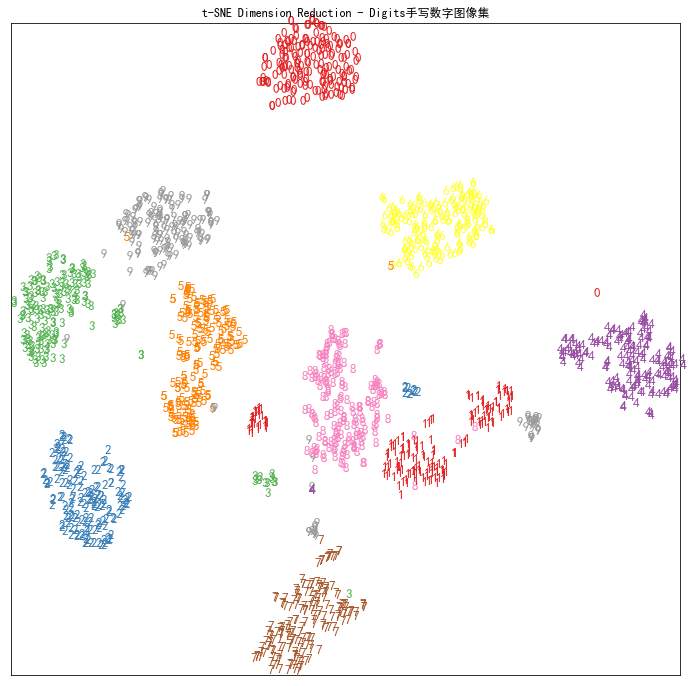

In [33]:
plt.figure(figsize=(12,12))
for i in range(data.shape[0]):
    plt.text(X_tsne[i,0],X_tsne[i,1],str(label[i]),color=plt.cm.Set1(label[i]/10.),
             fontdict={'weight':'bold','size':13})
plt.xticks([])
plt.yticks([])
plt.title('t-SNE Dimension Reduction - Digits手写数字图像集')
plt.show()

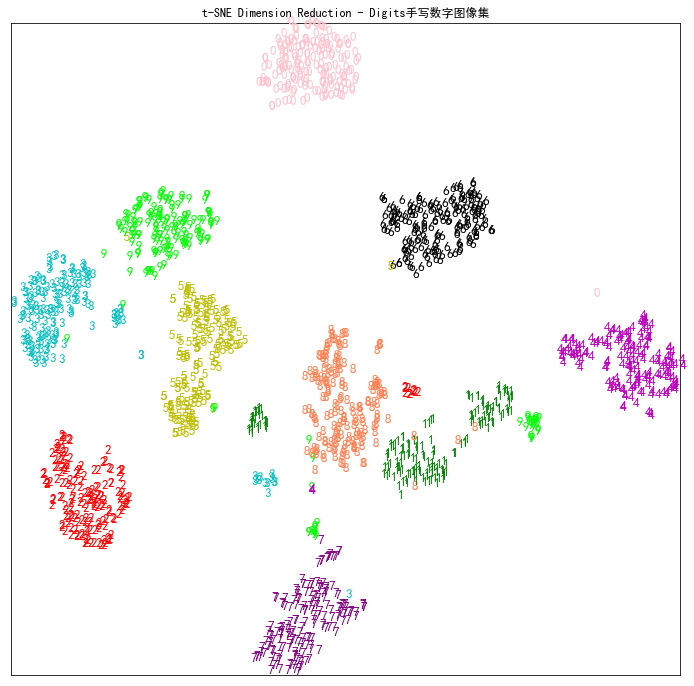

In [36]:
plt.figure(figsize=(12,12))
colors = ['pink','g','r','c','m','y','k','purple','coral','lime']
for i in range(data.shape[0]):
    plt.text(X_tsne[i,0],X_tsne[i,1],str(label[i]),color=colors[label[i]],
             fontdict={'weight':'bold','size':13})
plt.xticks([])
plt.yticks([])
plt.title('t-SNE Dimension Reduction - Digits手写数字图像集')
plt.show()

#### 3D-Visualization

In [37]:
from sklearn.manifold import TSNE
tsne3=TSNE(n_components=3)
X_tsne3 = tsne3.fit_transform(data)

In [38]:
x3_min,x3_max=np.min(X_tsne3,0),np.max(X_tsne3,0)
X_tsne3=(X_tsne3-x3_min)/(x3_max-x3_min)

In [40]:
X_tsne3

array([[0.09047256, 0.5175128 , 0.6294054 ],
       [0.6005297 , 0.35876706, 0.3706485 ],
       [0.52773774, 0.7023834 , 0.26935473],
       ...,
       [0.5863953 , 0.57914585, 0.3700039 ],
       [0.4759172 , 0.68316853, 0.7333403 ],
       [0.5745084 , 0.68399674, 0.4305407 ]], dtype=float32)

In [41]:
Y_train=label
Y_train

array([0, 1, 2, ..., 8, 9, 8])

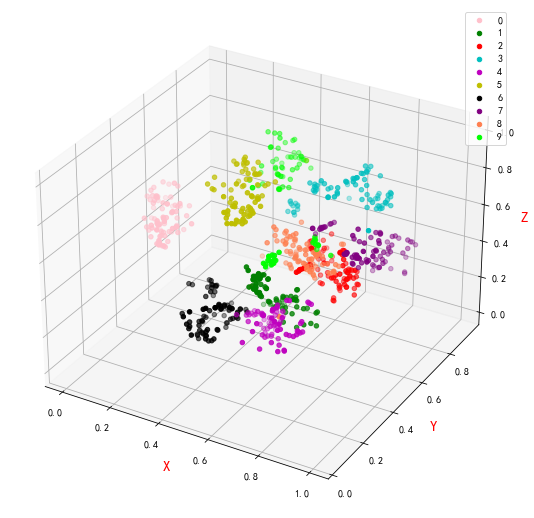

In [43]:
from mpl_toolkits.mplot3d import Axes3D #空间三维画图

colors = ['pink','g','r','c','m','y','k','purple','coral','lime']
colors_map = Y_train

nb_classes = 10

# scatter plot
fig=plt.figure(figsize=(10,7))
ax=Axes3D(fig)

# iterate each type of digit
for cl in range(nb_classes):
    # 找到属于某种数字数据的索引号
    indices=np.where(colors_map==cl)[0]
    # 在空间直角坐标系中绘制数据点
    ax.scatter(X_tsne3[indices[:80],0],X_tsne3[indices[:80],1],X_tsne3[indices[:80],2],
              c=colors[cl],label=cl)
       
# add axis(Z,Y,X)
ax.set_zlabel('Z',fontdict={'size':15,'color':'red'})
ax.set_ylabel('Y',fontdict={'size':15,'color':'red'})
ax.set_xlabel('X',fontdict={'size':15,'color':'red'})
plt.legend()
plt.show()

#### Principal component analysis (PCA)

In [44]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

In [45]:
x_pca=pca.fit_transform(data)
x_pca

array([[ -1.25946612,  21.27488476],
       [  7.95761276, -20.76869724],
       [  6.99192196,  -9.95598882],
       ...,
       [ 10.80128375,  -6.96025299],
       [ -4.87210113,  12.4239512 ],
       [ -0.34439133,   6.36554702]])

In [47]:
xp_min,xp_max=np.min(x_pca,0),np.max(x_pca,0)
x_pca=(x_pca-xp_min)/(xp_max-xp_min)
x_pca

array([[0.47575034, 0.84688604],
       [0.62235563, 0.11679354],
       [0.60699552, 0.30455769],
       ...,
       [0.66758658, 0.35657904],
       [0.41828838, 0.69318838],
       [0.49030536, 0.58798337]])

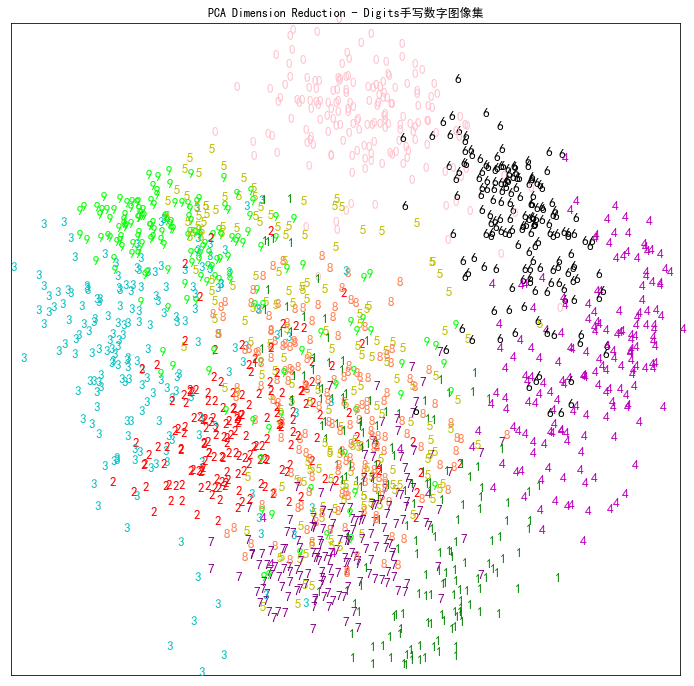

In [48]:
plt.figure(figsize=(12,12))
colors = ['pink','g','r','c','m','y','k','purple','coral','lime']
for i in range(data.shape[0]):
    plt.text(x_pca[i,0],x_pca[i,1],str(label[i]),color=colors[label[i]],
             fontdict={'weight':'bold','size':13})
plt.xticks([])
plt.yticks([])
plt.title('PCA Dimension Reduction - Digits手写数字图像集')
plt.show()

In [49]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
x_pca2 = pca.fit_transform(data)

In [50]:
xp2_min,xp2_max=np.min(x_pca2,0),np.max(x_pca2,0)
x_pca2=(x_pca2-xp2_min)/(xp2_max-xp2_min)
x_pca2

array([[0.47575038, 0.84688606, 0.31992416],
       [0.62235566, 0.11679352, 0.54412072],
       [0.60699553, 0.30455779, 0.52023857],
       ...,
       [0.66758661, 0.35657912, 0.56282794],
       [0.41828842, 0.69318849, 0.3085098 ],
       [0.49030539, 0.58798348, 0.6462678 ]])

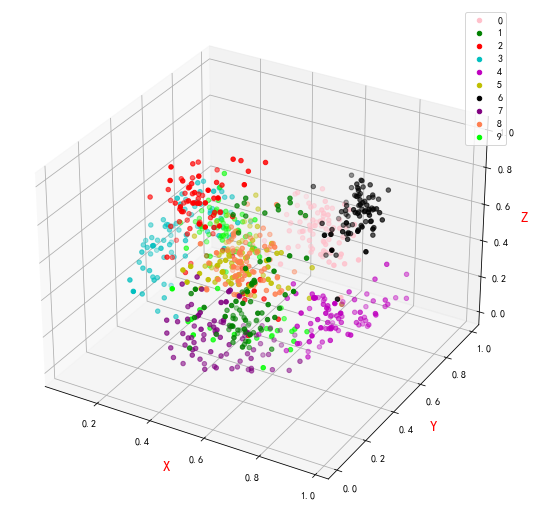

In [51]:
from mpl_toolkits.mplot3d import Axes3D #空间三维画图

colors = ['pink','g','r','c','m','y','k','purple','coral','lime']
colors_map = Y_train

nb_classes = 10

# scatter plot
fig=plt.figure(figsize=(10,7))
ax=Axes3D(fig)

# iterate each type of digit
for cl in range(nb_classes):
    # 找到属于某种数字数据的索引号
    indices=np.where(colors_map==cl)[0]
    # 在空间直角坐标系中绘制数据点
    ax.scatter(x_pca2[indices[:80],0],x_pca2[indices[:80],1],x_pca2[indices[:80],2],
              c=colors[cl],label=cl)
       
# add axis(Z,Y,X)
ax.set_zlabel('Z',fontdict={'size':15,'color':'red'})
ax.set_ylabel('Y',fontdict={'size':15,'color':'red'})
ax.set_xlabel('X',fontdict={'size':15,'color':'red'})
plt.legend()
plt.show()